<a href="https://colab.research.google.com/github/sonni-a/cs102/blob/homework_06/homework_06_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
library(dplyr)
install.packages("ggplot2")
library(ggplot2)
ds <- read.csv("music_genre.csv") #1
ds <- sample_n(ds, 20000) #2
ds <- distinct(ds) #3
ds_new <- subset(ds, artist_name!="empty_field") #4
message("Количество строк с empty_field в artist_name: ", nrow(ds[ds$artist_name == "empty_field", ]))
ds_new <- na.omit(ds_new)
ds_new

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Количество строк с empty_field в artist_name: 999



,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,57404,Peggy Lee,Why Don't You Do Right (Get Me Some Money Too),45,8.01e-01,0.7070,149227,0.25100,0.00e+00,D,0.1050,-10.740,Minor,0.0378,124.081,4-Apr,0.6520,Jazz
3,91167,Turnover,Bonnie (Rhythm & Melody),43,6.75e-03,0.6140,307862,0.65300,1.08e-02,A,0.1080,-7.817,Major,0.0278,109.995,4-Apr,0.3920,Alternative
4,22186,Madonna,Crazy for You,59,1.07e-01,0.6620,224320,0.71900,0.00e+00,A,0.1020,-6.606,Major,0.0298,95.001,4-Apr,0.5110,Rock
6,44331,Ski Mask The Slump God,GEEKIN,57,5.07e-02,0.8970,145987,0.29300,3.91e-05,C#,0.1000,-8.771,Major,0.1710,145.029,4-Apr,0.2040,Hip-Hop
7,57111,Kevin Penkin,Quartet,24,8.58e-01,0.6470,136653,0.16200,1.27e-01,G,0.1040,-15.417,Major,0.0649,160.691,4-Apr,0.3010,Anime
8,90719,Yung Pinch,When I Get Home (Hotel California),54,4.06e-01,0.7290,203813,0.69800,0.00e+00,F,0.1080,-4.986,Minor,0.0545,131.966,4-Apr,0.4660,Rap
9,50207,My Morning Jacket,Victory Dance,40,2.92e-01,0.5330,340027,0.48600,4.37e-01,G#,0.1030,-9.316,Major,0.0298,133.832,4-Apr,0.0747,Alternative
10,88729,Little Dragon,Klapp Klapp,40,9.23e-02,0.6590,217120,0.86500,1.08e-04,D,0.4850,-4.975,Minor,0.0744,150.034,4-Apr,0.7870,Electronic
11,88180,Jimi Hendrix,Woodstock,38,2.14e-02,0.5420,319000,0.70500,1.90e-02,C,0.2640,-9.124,Major,0.0335,124.066,4-Apr,0.8940,Blues


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [ ]:
genres <- ds$music_genre #1
genre_props <- table(genres[genres != ""])
data.frame(prop.table(genre_props))

Var1,Freq
<fct>,<dbl>
Alternative,0.09931490
Anime,0.09991499
Blues,0.10031505
Classical,0.10061509
Country,0.10076511
Electronic,0.10216532
Hip-Hop,0.10106516
Jazz,0.10026504
Rap,0.09651448


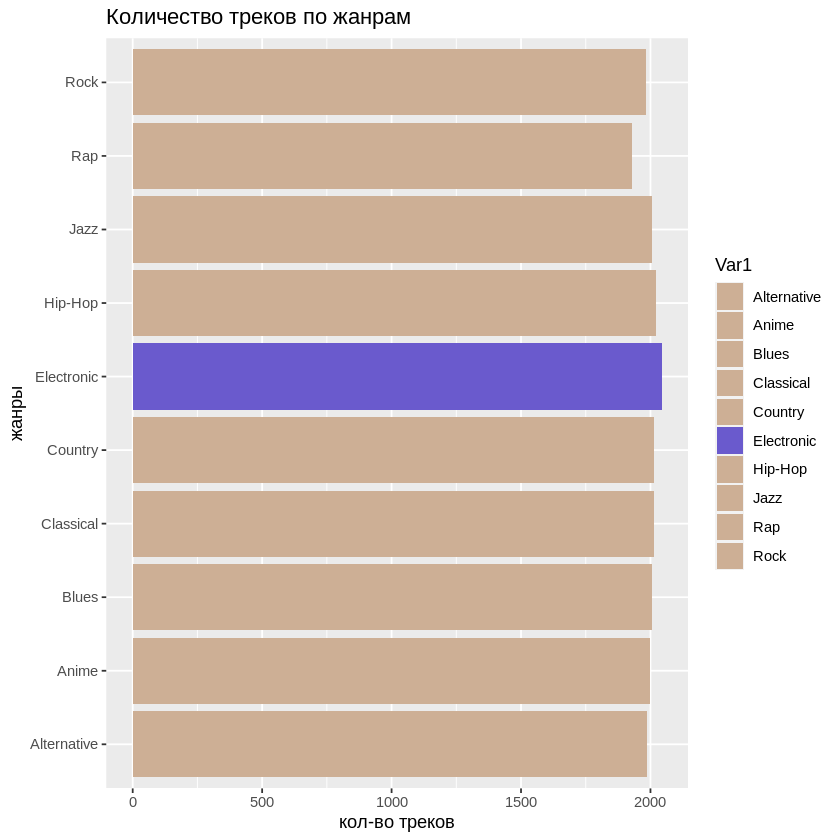

In [ ]:
proportions <- data.frame(prop.table(genre_props)) #2

colors <- c(rep("peachpuff3", nrow(genre_props)))
colors[[which.max(proportions$Freq)]] <- "slateblue"

ggplot(data = proportions, aes(x = Var1, y = Freq * nrow(ds), fill = Var1)) + coord_flip() + geom_bar(stat = "identity") +
  xlab("жанры") + ylab("кол-во треков") + ggtitle("Количество треков по жанрам") + scale_fill_manual(values = colors)

In [ ]:
danceability_by_genre <- ds_new %>% #3
group_by(music_genre) %>%
summarize(mean = mean(danceability))
most_danceable_genre <- danceability_by_genre %>%
arrange(desc(mean)) %>%
head(1)
message("самый танцевальный жанр: ", most_danceable_genre$music_genre)

get_tone <- function(genres) {major <- sum(genres$mode == "Major") #4
  minor <- sum(genres$mode == "Minor")

  if (major > minor) {tone <- "Major"}
  else {tone <- "Minor"}
  return(data.frame(Genre = unique(genres$music_genre), mode = tone))}

grouped <- by(ds, ds$music_genre, get_tone)
tones <- data.frame(do.call("rbind", grouped))
tones <- tones[2:nrow(result),]
rownames(tones) <- NULL
tones

самый танцевальный жанр: Hip-Hop



Genre,mode
<chr>,<chr>
Alternative,Major
Anime,Major
Blues,Major
Classical,Major
Country,Major
Electronic,Major
Hip-Hop,Major
Jazz,Major
Rap,Major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

Исполнитель с наибольшим количеством треков: Nobuo Uematsu

Исполнитель с наименьшим количеством треков: "Weird Al" Yankovic



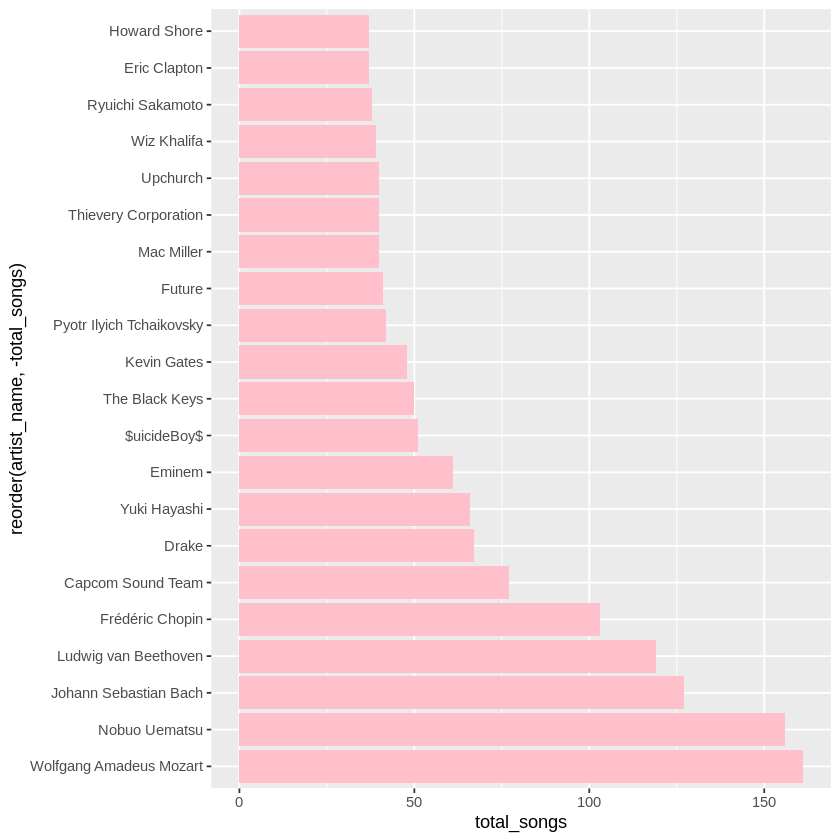

In [ ]:
ds_new <- na.omit(ds_new)

most <- names(sort(table(ds_new$artist_name), decreasing=TRUE)[1]) #1
message("Исполнитель с наибольшим количеством треков: ", most_tracks)
least <- names(sort(table(ds_new$artist_name))[1])
message("Исполнитель с наименьшим количеством треков: ", least_tracks)

top_artists <- ds_new %>% #2
  group_by(artist_name) %>%
  summarize(total_songs = n()) %>%
  top_n(20, total_songs) %>%
  arrange(desc(total_songs))

ggplot(top_artists, aes(y = reorder(artist_name, -total_songs), x = total_songs)) + geom_bar(stat = "identity", fill = "pink") +
  theme(axis.text.y = element_text(hjust = 1))

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,57404,45,0.80100,0.707,149227,0.251,0.00e+00,0.105,-10.740,0.0378,0.652
3,91167,43,0.00675,0.614,307862,0.653,1.08e-02,0.108,-7.817,0.0278,0.392
4,22186,59,0.10700,0.662,224320,0.719,0.00e+00,0.102,-6.606,0.0298,0.511
6,44331,57,0.05070,0.897,145987,0.293,3.91e-05,0.100,-8.771,0.1710,0.204
7,57111,24,0.85800,0.647,136653,0.162,1.27e-01,0.104,-15.417,0.0649,0.301
8,90719,54,0.40600,0.729,203813,0.698,0.00e+00,0.108,-4.986,0.0545,0.466


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000,0.000,-0.006,0.000,-0.009,0.012,-0.001,-0.001,0.006,-0.007,0.008
popularity,0.000,1.000,-0.294,0.352,-0.082,0.213,-0.371,-0.038,0.316,0.220,0.121
acousticness,-0.006,-0.294,1.000,-0.357,0.056,-0.793,0.382,-0.102,-0.736,-0.169,-0.277
danceability,0.000,0.352,-0.357,1.000,-0.146,0.267,-0.308,-0.053,0.395,0.272,0.438
duration_ms,-0.009,-0.082,0.056,-0.146,1.000,-0.065,0.132,0.007,-0.097,-0.089,-0.123
energy,0.012,0.213,-0.793,0.267,-0.065,1.000,-0.383,0.183,0.840,0.164,0.398


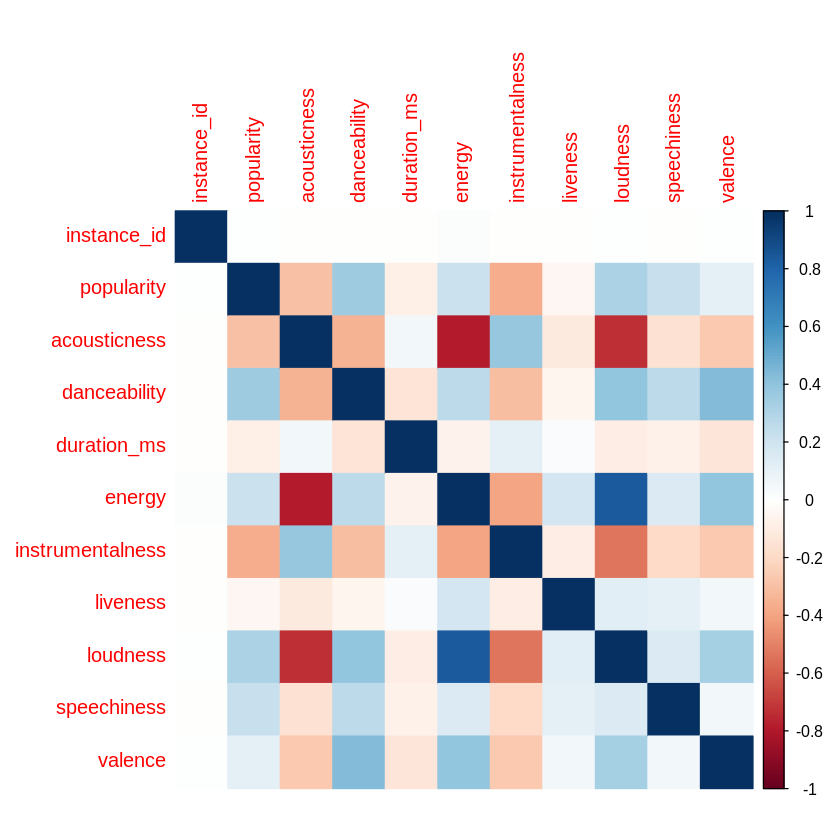

Корреляция между популярностью (popularity) и длиной названия трека: -0.0822193218261421



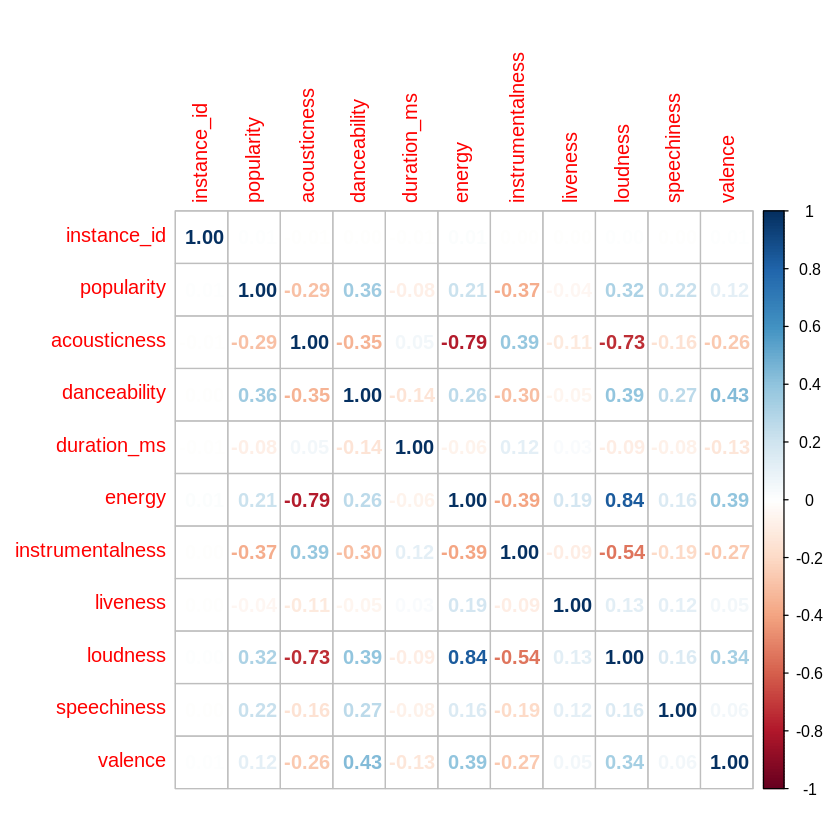

In [ ]:
ds_new <- na.omit(ds_new)
install.packages("corrplot") #1
library(corrplot)
corrds <- select_if(ds_new, is.numeric)
head(corrds)
cormatrix<-cor(corrds, use="pairwise.complete.obs")
head(round(M,3))
corrplot(cormatrix, method="color")
corrplot(cormatrix, method="number")

corrds <- select_if(ds_new, is.numeric) #2
message("Корреляция между популярностью (popularity) и длиной названия трека: ", cor(ds_new$popularity, ds_new$duration_ms, use = "complete.obs"))

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

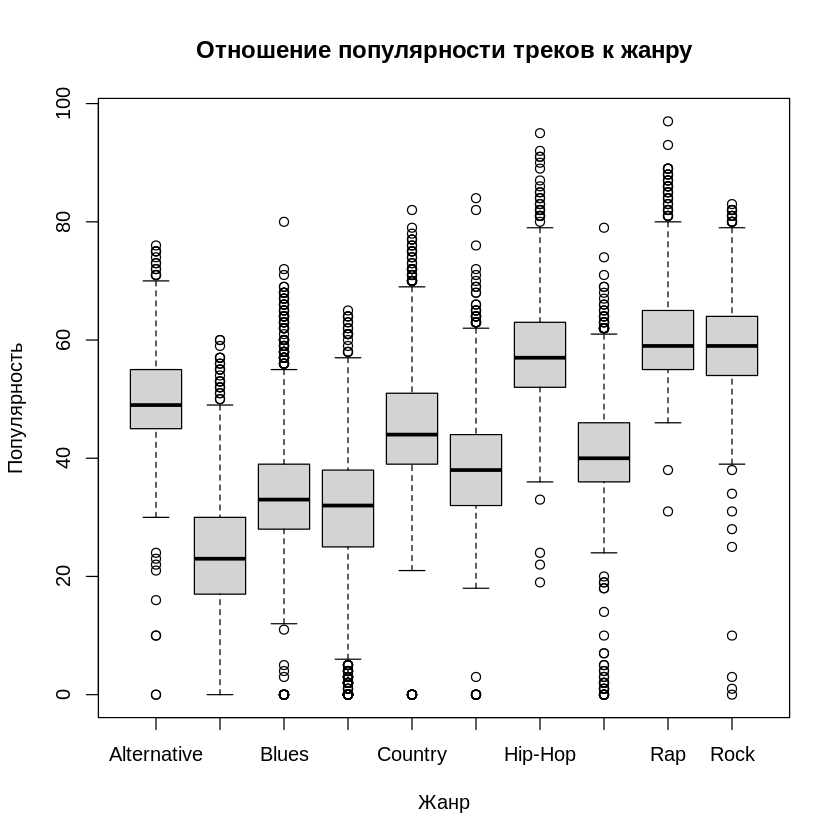

In [ ]:
boxplot(popularity ~ music_genre, data = ds_new, xlab = "Жанр", ylab = "Популярность",
        main = "Отношение популярности треков к жанру")

#Задание 7
На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”


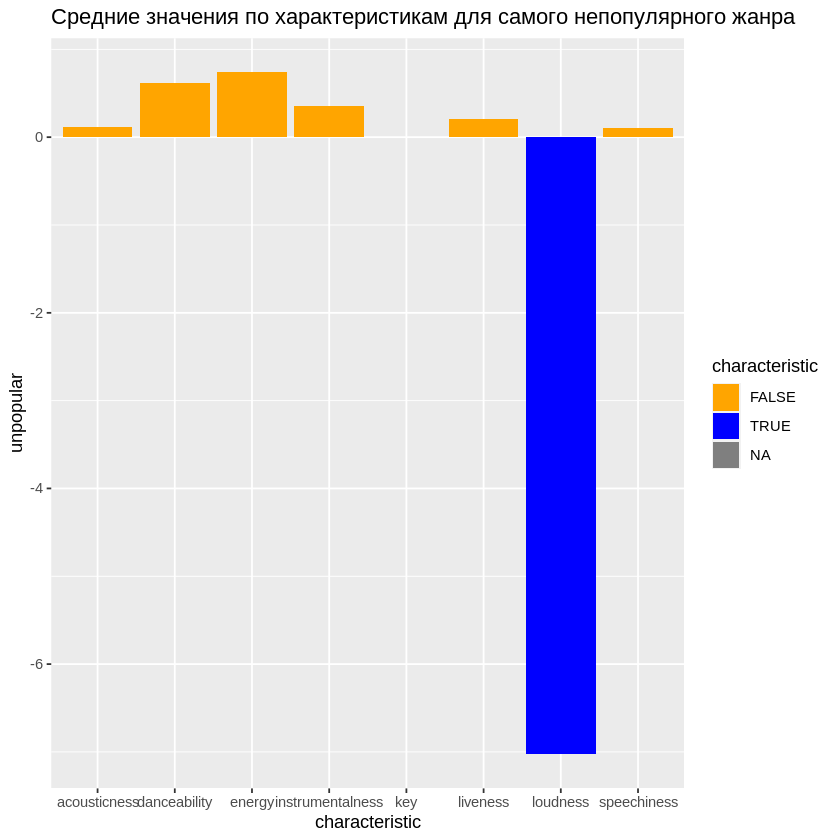

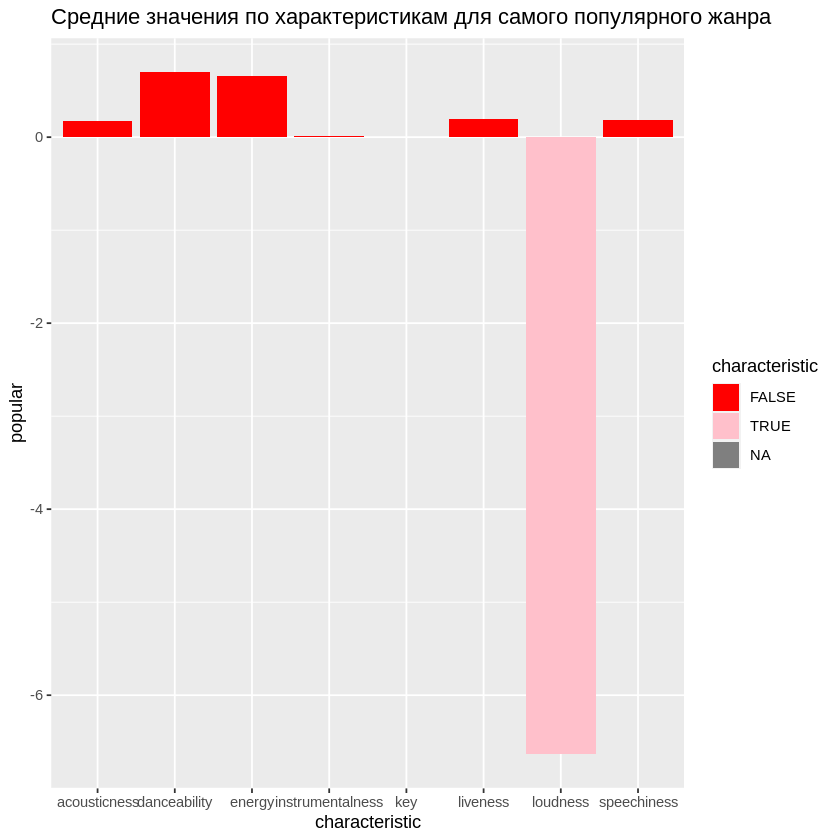

In [ ]:
most <- ds$music_genre[which.max(genre_proportions$Freq)]
least <- ds$music_genre[which.min(genre_proportions$Freq)]
popular_genre <- ds[ds$music_genre == most, ]
unpopular_genre <- ds[ds$music_genre == least, ]
c <- c("acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "speechiness")
pop_mean <- sapply(popular_genre[, chars], mean)
unpop_mean <- sapply(unpopular_genre[, chars], mean)

means_ds <- data.frame(
  characteristic = c,
  popular = pop_mean,
  unpopular = unpop_mean
)

ggplot(means_ds, aes(x = characteristic, fill = characteristic)) +
  geom_col(aes(y = unpopular, fill = unpopular < 0), position = "dodge") +
  scale_fill_manual(values = c("orange", "blue")) +
  ggtitle("Средние значения по характеристикам для самого непопулярного жанра")

ggplot(means_ds, aes(x = characteristic, fill = characteristic)) +
  geom_col(aes(y = popular, fill = popular < 0), position = "dodge") +
  scale_fill_manual(values = c("red", "pink")) +
  ggtitle("Средние значения по характеристикам для самого популярного жанра")

#Задание 8
1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [ ]:
ds_new$длительность_трека <- cut(ds_new$duration_ms/1000/60,
                                      breaks = c(0, 3, 5, Inf),
                                      labels = c("короткая", "средняя", "длинная"))
ds_new <- subset(ds_new, длительность_трека!='NA')
#ds_new

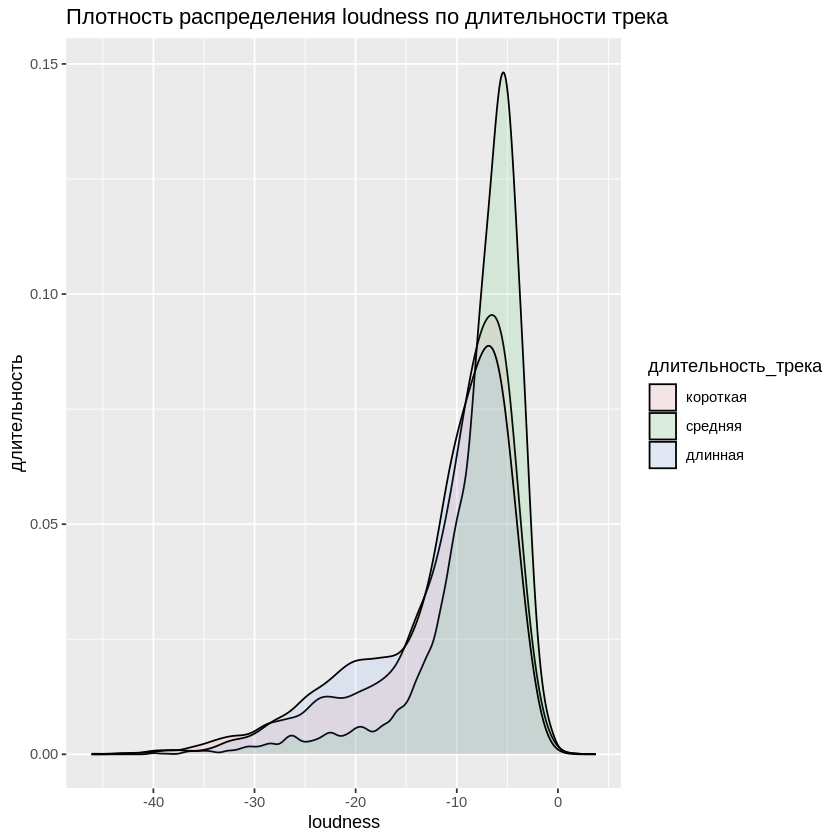

In [ ]:
ggplot(ds_new, aes(x = loudness, fill = длительность_трека)) +
  geom_density(alpha = 0.1) +
  xlab("loudness") +
  ylab("длительность") +
  ggtitle("Плотность распределения loudness по длительности трека")

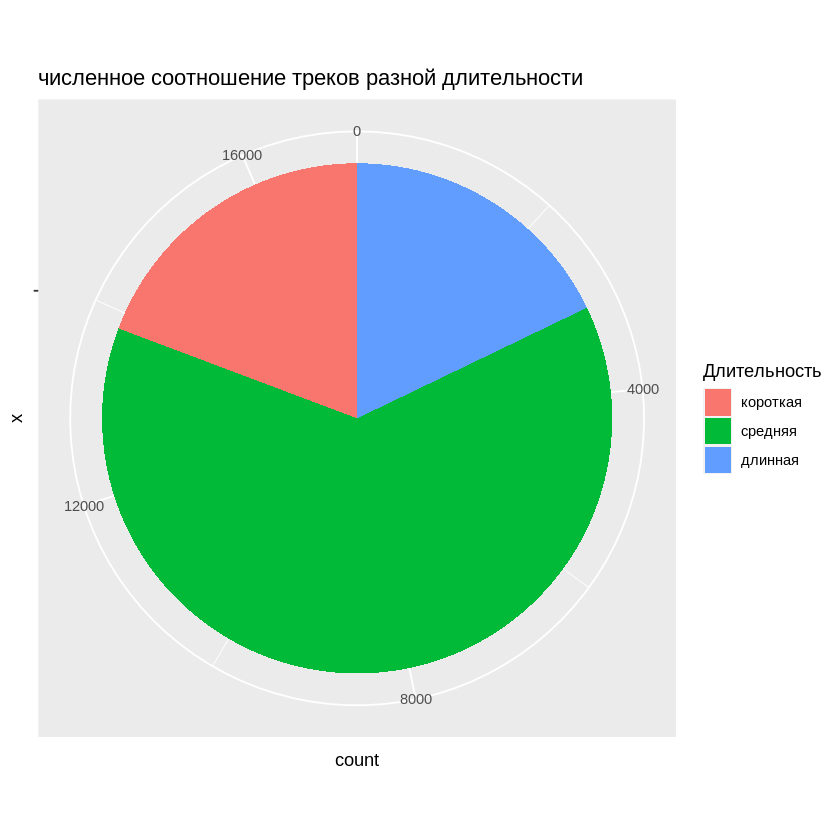

In [ ]:
ggplot(ds_new, aes(x = "", fill = длительность_трека)) +
  geom_bar(width = 1) +
  coord_polar("y") +
  labs(fill = "Длительность") +
  ggtitle("численное соотношение треков разной длительности")